In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd "/content/drive/MyDrive/Colab Notebooks/essay_works/Josue/Compute/Datasets"

/content/drive/.shortcut-targets-by-id/1QxPrUQB_XTV6AHi70qBXwu7OodDMxrML/Josue/Compute/Datasets


In [ ]:
camer=pd.read_csv("camer.csv")

In [ ]:
Test=pd.read_csv("Testboot.csv")
#Test = Test.iloc[1: , :]
Test

In [ ]:
len(camer)

2136

In [ ]:
#cam.to_csv('camer.csv', index= False)

In [ ]:
training=camer[:2112]
len(training)

2112

In [ ]:
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
n_steps = 1
X_train, y_train= split_sequence(training.values.reshape(len(training) , 1), n_steps)

In [ ]:
n_steps = 1
X_test, y_test= split_sequence(Test.values.reshape(len(Test) , 1), n_steps)

In [ ]:
for i in range(len(X_test)):
  print(X_test[i], y_test[i])

In [ ]:
for i in range(len(X_train)):
  print(X_train[i], y_train[i])

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2111, 1, 1) (24, 1, 1) (2111, 1) (24, 1)


In [ ]:
from numpy import asarray
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
import time

In [ ]:
def fit_model(X_train1, y_train1):
  model= Sequential()
  #adding the first LSTM layer and some dropout regularization
  model.add(LSTM(100, activation='relu' , return_sequences=True, input_shape=(X_train1.shape[1],1)))
  model.add(LSTM(100, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(units=1))
  #Compiling the RNN
  model.compile(optimizer= 'adam', loss= 'mean_squared_error')
  #Fitting the RNN to the training set
  history=model.fit(X_train1, y_train1, epochs=10,batch_size=64, verbose=0)
  #plt.figure(figsize=(15, 10))
  #plt.plot(history.history['loss'])
  #plt.title('Model loss')
  #plt.ylabel('Mean Squared Error')
  #plt.xlabel('Epoch')
  #print(model.summary())
  #plt.savefig('lstm2plot.png')
  #plt.show()
  return model

In [ ]:
# fit an ensemble of models
def fit_ensemble(n_members, X_train1, X_test1, y_train1, y_test1):
	ensemble = list()
	for i in range(n_members):
		# define and fit the model on the training set
		model = fit_model(X_train1, y_train1)
		#model.history['loss']
		# evaluate model on the test set
		yhat = model.predict(X_test1)
		mae = mean_absolute_error(y_test1, yhat)
		print('>Model %d, MAE: %.3f' % (i+1, mae))
		# store the model
		print(yhat)
		ensemble.append(model)
	return ensemble

In [ ]:
# make predictions with the ensemble and calculate a prediction interval
def predict_with_pi(ensemble, X):
	# make predictions
	yhat = [model.predict(X) for model in ensemble]
	#print(len(yhat.shape))
	yhat = asarray(yhat)
	# calculate 95% gaussian prediction interval
	interval = 2.58*yhat.std()
	lower, upper = yhat.mean() - interval, yhat.mean() + interval
	return lower, yhat.mean(), upper

In [ ]:
# fit ensemble
time_start=time.time()
n_members = 20
ensemble = fit_ensemble(n_members, X_train, X_test, y_train, y_test)
print(time.time()-time_start)

In [ ]:
#mat = np.array(my_pred)

In [ ]:
#for i in range(len(mat)):
 # print(mat[i].std())

In [ ]:
#point_forecasts=np.mean(mat, axis=0)

In [ ]:
time_start=time.time()
y_pred =[]
count_true_in_ci=[]
count_true_not_in_ci=[] 
low=[]
upp=[]
for i in range(len(X_test)):
  lower, mean, upper = predict_with_pi(ensemble, X_test[i].reshape((1, n_steps, 1)))
  low.append(lower)
  upp.append(upper)
  y_pred.append(mean)
  print('Point prediction: %.3f' % mean)
  print('97%% prediction interval: [%.3f, %.3f]' % (lower, upper))
  print('True value: %.3f' % y_test[i])
  if lower <= y_test[i] <= upper:
    count_true_in_ci.append(y_test[i])
  else:
    count_true_not_in_ci.append(y_test[i])
print(time.time()-time_start)

Point prediction: -0.102
97% prediction interval: [-0.124, -0.080]
True value: -0.168
Point prediction: -0.161
97% prediction interval: [-0.184, -0.138]
True value: -0.173
Point prediction: -0.166
97% prediction interval: [-0.189, -0.143]
True value: -0.171
Point prediction: -0.164
97% prediction interval: [-0.187, -0.141]
True value: -0.187
Point prediction: -0.180
97% prediction interval: [-0.203, -0.157]
True value: -0.184
Point prediction: -0.177
97% prediction interval: [-0.200, -0.154]
True value: -0.152
Point prediction: -0.145
97% prediction interval: [-0.167, -0.122]
True value: -0.082
Point prediction: -0.074
97% prediction interval: [-0.096, -0.052]
True value: 0.024
Point prediction: 0.032
97% prediction interval: [0.009, 0.055]
True value: 0.150
Point prediction: 0.158
97% prediction interval: [0.132, 0.184]
True value: 0.301
Point prediction: 0.308
97% prediction interval: [0.280, 0.336]
True value: 0.398
Point prediction: 0.404
97% prediction interval: [0.375, 0.433]
Tru

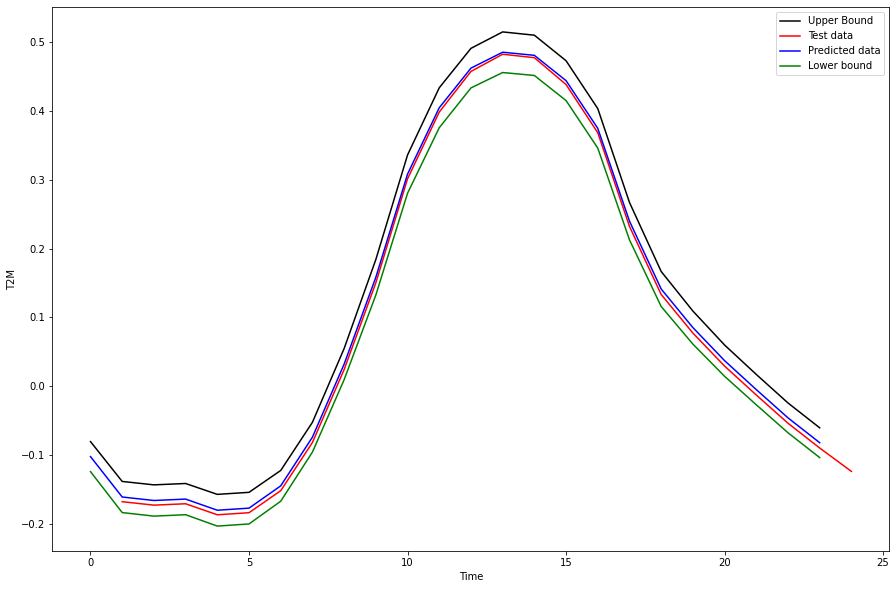

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(upp, color='black', label='Upper Bound ')
plt.plot(range(1,25),y_test, color='red', label='Test data')
plt.plot(y_pred, color='blue', label='Predicted data')
plt.plot(low, color='green', label='Lower bound')
plt.xlabel('Time')
plt.ylabel('T2M')
plt.legend()
plt.savefig('prediction_interval.png')
plt.show()

# compute and store the coverage

In [ ]:
coverage=len(count_true_in_ci)/len(X_test)
coverage

0.25

In [ ]:
cov=[0.2916666666666667,0.16666666666666666,0.25,0.25,0.25,0.2916666666666667,0.25,0.25,0.20833333333333334,0.20833333333333334,0.16666666666666666,0.20833333333333334,0.20833333333333334,0.3333333333333333,0.25,0.2916666666666667,0.20833333333333334,0.20833333333333334,0.3333333333333333,0.16666666666666666,0.25,0.16666666666666666,0.20833333333333334,0.20833333333333334]

In [ ]:
len(cov)

24

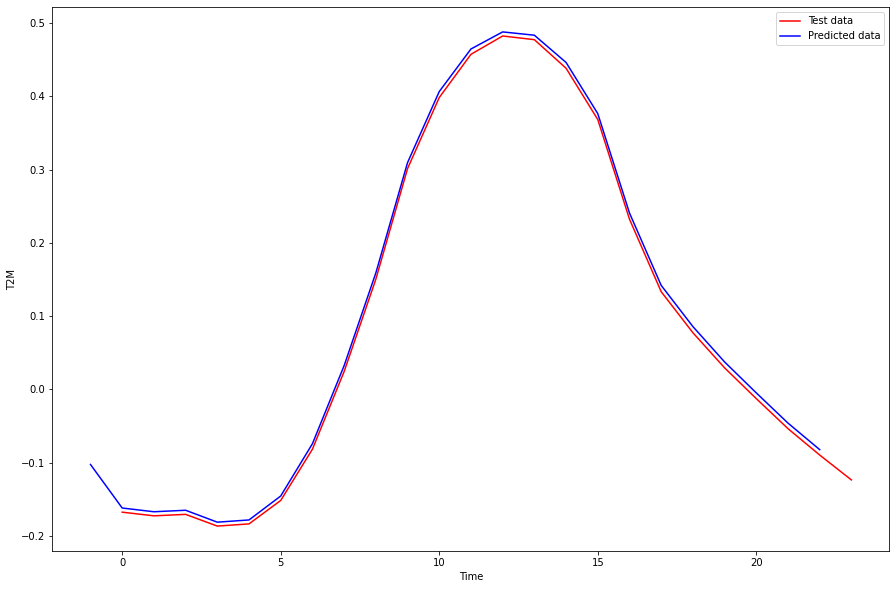

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(y_test, color='red', label='Test data')
plt.plot(range(-1,23),point_forecasts, color='blue', label='Predicted data')
plt.xlabel('Time')
plt.ylabel('T2M')
plt.legend()
#plt.savefig('lstm4plot.png')
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'MAPE':mape, 'ME':me, 'MAE': mae, 
            'MPE': mpe, 'RMSE':rmse})
forecast_accuracy(y_pred, y_test)

{'MAE': 0.2671557932599773,
 'MAPE': 2.7007620491134796,
 'ME': 0.01101251942060424,
 'MPE': -1.1662116442476047,
 'RMSE': 0.3349899486553737}

# Store the RMSE

In [ ]:
RMSE=[ 0.334034598426389,0.33335116096123407,0.3350218267561869,0.3361425420477114,0.33415961120129467,0.3347608480043182,0.3343107736859043,0.3344068605397283,0.33510449778575624,0.3341835912190577,0.3340930318988123,0.33442633176025993,0.33458776947762053,0.33606018807369015,0.33438440902740935,0.3345699435271909,0.3341561324336417,0.33384265007635067,0.3338148983218715,0.33478170662827794,0.3337415881647179,0.3338945386509631,0.33342729349007894,0.3335868918491173]

# Store all predicted

In [ ]:
Matrix=[[-0.100286506,-0.1586927,-0.16371492,-0.16170797,-0.177741,-0.17474012,-0.14257622,-0.07242293,0.032109547,
 0.15623254,
 0.30423206,
 0.39958176,
 0.4567287,
 0.47964048,
 0.47515005,
 0.43860298,
 0.3700759,
 0.23660532,
 0.13950619,
 0.08434198,
 0.037032418,
 -0.004351198,
 -0.04474966,
 -0.08034985],[-0.105318986,
 -0.16310468,
 -0.16814354,
 -0.16612929,
 -0.1822044,
 -0.17919423,
 -0.14702997,
 -0.07804909,
 0.026229385,
 0.15068561,
 0.29742748,
 0.39269635,
 0.44969907,
 0.47251692,
 0.46806675,
 0.43168417,
 0.36312225,
 0.23044613,
 0.13404809,
 0.07884847,
 0.031191733,
 -0.010438584,
 -0.05073928,
 -0.085834906],[-0.1062492,
 -0.1651789,
 -0.17024593,
 -0.16822015,
 -0.18438071,
 -0.18135953,
 -0.14888151,
 -0.07835001,
 0.026824895,
 0.15229586,
 0.30093175,
 0.3963502,
 0.45410556,
 0.47727832,
 0.4727475,
 0.43582195,
 0.36677137,
 0.2330794,
 0.13544753,
 0.07963328,
 0.031815242,
 -0.009973097,
 -0.050634127,
 -0.086284734],
[-0.10490042,
 -0.16389559,
 -0.16892251,
 -0.16691056,
 -0.1829274,
 -0.17993154,
 -0.14774348,
 -0.07650322,
 0.030045042,
 0.15643628,
 0.30557513,
 0.4017952,
 0.45931667,
 0.4825235,
 0.47797185,
 0.44110742,
 0.37195438,
 0.23741297,
 0.13951086,
 0.08338181,
 0.035085496,
 -0.0071053356,
 -0.048356343,
 -0.08457373],[-0.09591763,
 -0.15365385,
 -0.15863831,
 -0.15664408,
 -0.17256913,
 -0.16958758,
 -0.13766606,
 -0.068405256,
 0.0357346,
 0.15983014,
 0.30859846,
 0.40435076,
 0.4616167,
 0.48448285,
 0.48001632,
 0.44346732,
 0.37470824,
 0.2406945,
 0.14306521,
 0.08798459,
 0.040676225,
 -0.00079801324,
 -0.04105538,
 -0.07624157],[-0.09904265,
 -0.15700947,
 -0.16199383,
 -0.16000064,
 -0.1758913,
 -0.17292476,
 -0.14100875,
 -0.07141225,
 0.033733897,
 0.15862557,
 0.30702662,
 0.40311733,
 0.46079007,
 0.48397398,
 0.47944498,
 0.44246697,
 0.37334016,
 0.23906207,
 0.14184035,
 0.08645464,
 0.038726464,
 -0.0031918243,
 -0.04381483,
 -0.079296455],[-0.09735982,
 -0.15569799,
 -0.16069952,
 -0.15870126,
 -0.17464182,
 -0.171664,
 -0.13960719,
 -0.06959508,
 0.034785673,
 0.15900575,
 0.30692843,
 0.4032363,
 0.4607145,
 0.483543,
 0.47908035,
 0.4425059,
 0.3733266,
 0.23916972,
 0.1422731,
 0.087019,
 0.039712984,
 -0.0016789628,
 -0.042036407,
 -0.07750784],[-0.10449158,
 -0.16201583,
 -0.16699669,
 -0.16500627,
 -0.18088545,
 -0.17791912,
 -0.14608055,
 -0.07680015,
 0.02852875,
 0.15374352,
 0.30165112,
 0.39707586,
 0.4545711,
 0.47775093,
 0.47323108,
 0.43630663,
 0.3674894,
 0.23401666,
 0.1369497,
 0.081378184,
 0.033526238,
 -0.008358819,
 -0.049071148,
 -0.08471172],[-0.1038772,
 -0.16225304,
 -0.16726348,
 -0.16526365,
 -0.18122008,
 -0.17823079,
 -0.14612737,
 -0.07571192,
 0.030048123,
 0.15556051,
 0.30359986,
 0.39947274,
 0.45733395,
 0.48036823,
 0.4758655,
 0.43897086,
 0.36967725,
 0.23610523,
 0.13870806,
 0.08308095,
 0.03504835,
 -0.006853199,
 -0.047734432,
 -0.08373578],[-0.100304686,
 -0.15879758,
 -0.1637925,
 -0.1617958,
 -0.17768463,
 -0.17471962,
 -0.1426754,
 -0.07251815,
 0.032055322,
 0.15612808,
 0.3041806,
 0.40011233,
 0.45729774,
 0.48012075,
 0.4756581,
 0.4392396,
 0.37042728,
 0.23649922,
 0.13948563,
 0.0844442,
 0.037010636,
 -0.0045837583,
 -0.044983443,
 -0.08038988],[-0.10172801,
 -0.15991707,
 -0.1649218,
 -0.16291949,
 -0.17889658,
 -0.17591147,
 -0.14385772,
 -0.07396553,
 0.030300722,
 0.15459548,
 0.30266345,
 0.39837575,
 0.45581707,
 0.47886983,
 0.47436744,
 0.43764862,
 0.36866537,
 0.2349381,
 0.1378284,
 0.08261527,
 0.035228457,
 -0.0061864606,
 -0.046482436,
 -0.08187495],[-0.10139276,
 -0.1595031,
 -0.16455205,
 -0.1625339,
 -0.1786185,
 -0.17561692,
 -0.14335641,
 -0.073701024,
 0.031756166,
 0.15609062,
 0.30372667,
 0.39961594,
 0.45745382,
 0.48061338,
 0.47609347,
 0.43905893,
 0.36986417,
 0.23622063,
 0.13941906,
 0.084223844,
 0.03673058,
 -0.0051970007,
 -0.046007924,
 -0.08160956],[-0.10307827,
 -0.16173337,
 -0.16675727,
 -0.16474818,
 -0.18071517,
 -0.17773025,
 -0.14559086,
 -0.07510412,
 0.031120032,
 0.15612799,
 0.30356574,
 0.39859143,
 0.455686,
 0.4787518,
 0.47424346,
 0.4375468,
 0.36907056,
 0.23651628,
 0.13940068,
 0.08398655,
 0.03612694,
 -0.0059348564,
 -0.046979837,
 -0.08308343],[-0.101313494,
 -0.16051824,
 -0.16560832,
 -0.16357455,
 -0.17976359,
 -0.17673561,
 -0.14419685,
 -0.073100396,
 0.03296378,
 0.15854672,
 0.30850223,
 0.40490252,
 0.4622982,
 0.48519152,
 0.4806993,
 0.44412595,
 0.37516144,
 0.23987949,
 0.14166081,
 0.0859577,
 0.037952743,
 -0.0040605976,
 -0.045012537,
 -0.081137024],[-0.10409652,
 -0.16265915,
 -0.16768675,
 -0.16567495,
 -0.18170777,
 -0.17871481,
 -0.14653076,
 -0.07617098,
 0.029511595,
 0.15439999,
 0.30221784,
 0.39706534,
 0.4539346,
 0.47694916,
 0.47242403,
 0.43591985,
 0.36768195,
 0.23476927,
 0.13767631,
 0.08228338,
 0.034504626,
 -0.007428758,
 -0.048321523,
 -0.08411503],
[-0.09806497,
 -0.15602979,
 -0.16101821,
 -0.15901974,
 -0.17501234,
 -0.17201613,
 -0.13999277,
 -0.07060988,
 0.033732865,
 0.15831436,
 0.306937,
 0.40354577,
 0.46110052,
 0.4840824,
 0.47959647,
 0.4429521,
 0.3735216,
 0.23871195,
 0.1416064,
 0.08629391,
 0.038678136,
 -0.0029054866,
 -0.043228902,
 -0.07844597],[-0.09962152,
 -0.15847683,
 -0.16353372,
 -0.16151151,
 -0.17762937,
 -0.17461932,
 -0.14223179,
 -0.07190751,
 0.032736547,
 0.15722908,
 0.30466142,
 0.40020004,
 0.45742312,
 0.48043036,
 0.4758955,
 0.4393196,
 0.37058166,
 0.23715529,
 0.14057443,
 0.08539778,
 0.03771049,
 -0.0040135,
 -0.044473886,
 -0.079774715],[-0.09835614,
 -0.15655711,
 -0.16156866,
 -0.15956579,
 -0.17553252,
 -0.17255253,
 -0.14052388,
 -0.070615664,
 0.03404559,
 0.15854535,
 0.3055559,
 0.40063637,
 0.45794278,
 0.4810264,
 0.47649097,
 0.43974638,
 0.3711174,
 0.23826936,
 0.14197962,
 0.086713605,
 0.03901738,
 -0.0025585294,
 -0.042971004,
 -0.0785071],[-0.10308717,
 -0.16149047,
 -0.1664835,
 -0.16448694,
 -0.18040042,
 -0.17743531,
 -0.1454374,
 -0.075133555,
 0.02976138,
 0.15369551,
 0.30070552,
 0.396285,
 0.4534831,
 0.4762903,
 0.47185192,
 0.43537897,
 0.36659282,
 0.23344144,
 0.13710395,
 0.08210836,
 0.034700744,
 -0.006864617,
 -0.047424857,
 -0.083062544],[-0.10096184,
 -0.15922928,
 -0.16423537,
 -0.16223446,
 -0.1781843,
 -0.17519699,
 -0.14312981,
 -0.07295354,
 0.03276243,
 0.15814489,
 0.30555764,
 0.40131846,
 0.45878363,
 0.4819449,
 0.47740293,
 0.44067955,
 0.3715883,
 0.23810375,
 0.14142376,
 0.08582569,
 0.037785962,
 -0.0043832245,
 -0.04519113,
 -0.08092179],[-0.1041684,
 -0.16240184,
 -0.16738889,
 -0.16539417,
 -0.1813413,
 -0.17835984,
 -0.14638993,
 -0.07638472,
 0.029379537,
 0.15408067,
 0.30019027,
 0.39505833,
 0.4520065,
 0.47477704,
 0.4703033,
 0.43400365,
 0.36558565,
 0.23329285,
 0.13752897,
 0.08221097,
 0.034363806,
 -0.0076180594,
 -0.048561286,
 -0.08429687],[-0.10152131,
 -0.15967353,
 -0.16473092,
 -0.16271076,
 -0.17877717,
 -0.17578319,
 -0.14352341,
 -0.073982745,
 0.030506015,
 0.15401766,
 0.30155444,
 0.39763302,
 0.4555661,
 0.4788146,
 0.4742673,
 0.4371561,
 0.36780608,
 0.23406413,
 0.13746509,
 0.082657,
 0.0354437,
 -0.00608783,
 -0.046460383,
 -0.08183903],[-0.097647086,
 -0.15561107,
 -0.16058119,
 -0.158593,
 -0.17444037,
 -0.17148013,
 -0.13962454,
 -0.07014939,
 0.03479567,
 0.15847562,
 0.30541322,
 0.4001523,
 0.45737177,
 0.48015785,
 0.47571644,
 0.43920898,
 0.37076145,
 0.23827863,
 0.14188682,
 0.08709588,
 0.039745472,
 -0.0018766705,
 -0.04251375,
 -0.078001715],[-0.10535129,
 -0.16321166,
 -0.16820607,
 -0.16620737,
 -0.1821157,
 -0.17915013,
 -0.14719543,
 -0.07755462,
 0.027807135,
 0.15174565,
 0.2983839,
 0.39364466,
 0.4506864,
 0.47357535,
 0.46910042,
 0.43261695,
 0.36403808,
 0.23135808,
 0.13513885,
 0.080173574,
 0.032766256,
 -0.009009961,
 -0.04976279,
 -0.08549437]]

In [ ]:
m=np.array(Matrix)

In [ ]:
m.shape

(24, 24)

In [ ]:
step=[ " step "+ str(i)  for i in range(1,25,1)]

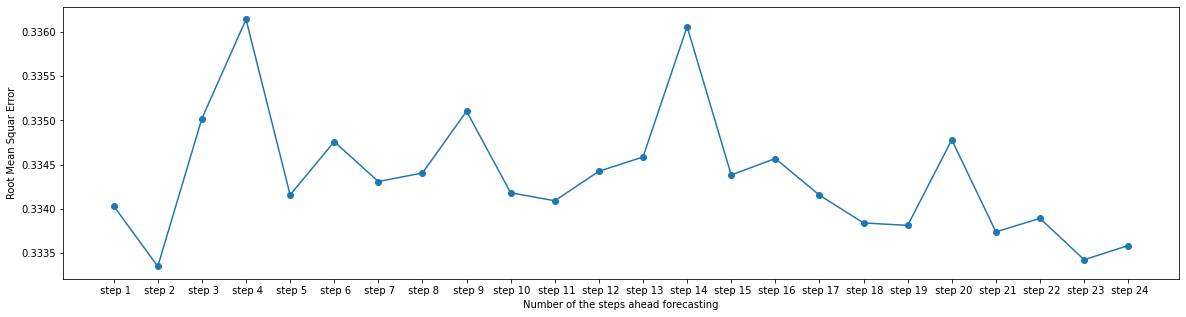

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(step,RMSE,'o-')
plt.xlabel("Number of the steps ahead forecasting")
plt.ylabel("Root Mean Squar Error")
plt.savefig('RMSE_number_step.png')

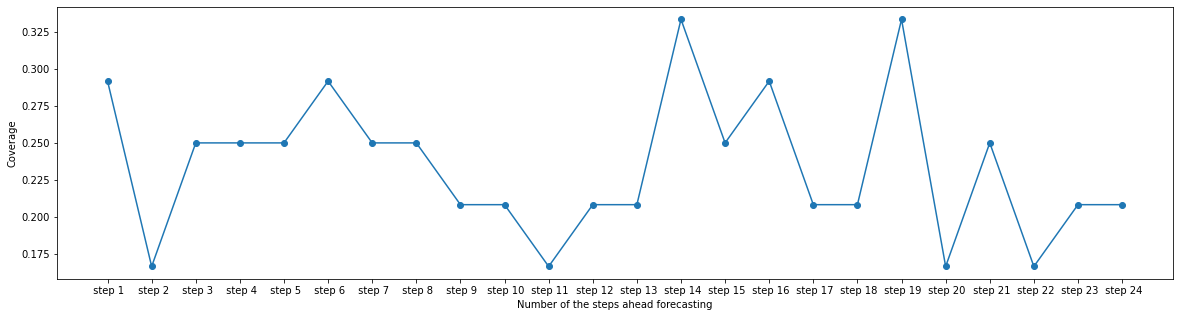

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(step,cov,'o-')
plt.xlabel("Number of the steps ahead forecasting")
plt.ylabel("Coverage")
plt.savefig('Coverage_number_step.png')

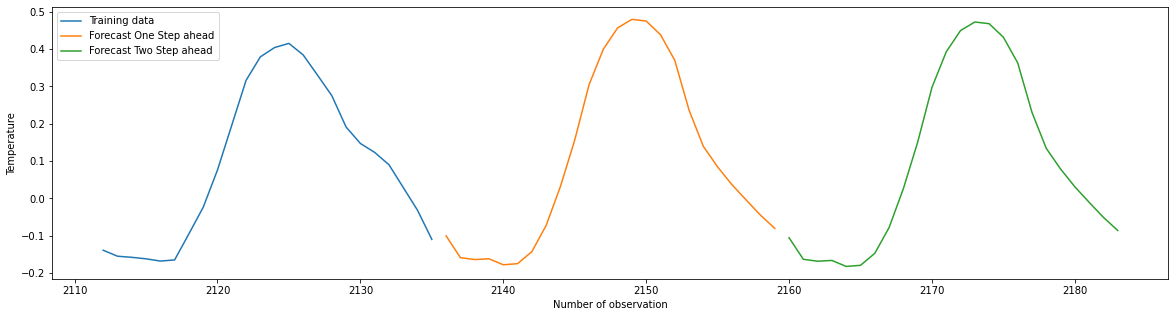

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(training[2112:2136],label='Training data')
plt.plot(range(2136,2160),m[0],label='Forecast One Step ahead')
plt.plot(range(2160,2184),m[1],label='Forecast Two Step ahead')
plt.xlabel('Number of observation')
plt.ylabel('Temperature')
plt.legend()
plt.savefig('number_of_step.png')

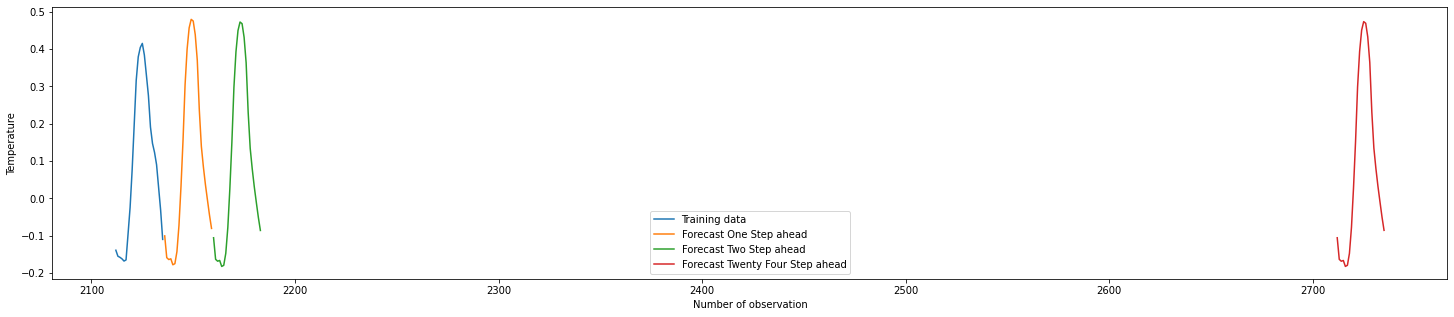

In [ ]:
plt.figure(figsize=(25, 5))
plt.plot(training[2112:2136],label='Training data')
plt.plot(range(2136,2160),m[0],label='Forecast One Step ahead')
plt.plot(range(2160,2184),m[1],label='Forecast Two Step ahead')
plt.plot(range(2712,2736),m[23],label='Forecast Twenty Four Step ahead')
plt.xlabel('Number of observation')
plt.ylabel('Temperature')
plt.legend()
plt.savefig('number_of_step2.png')

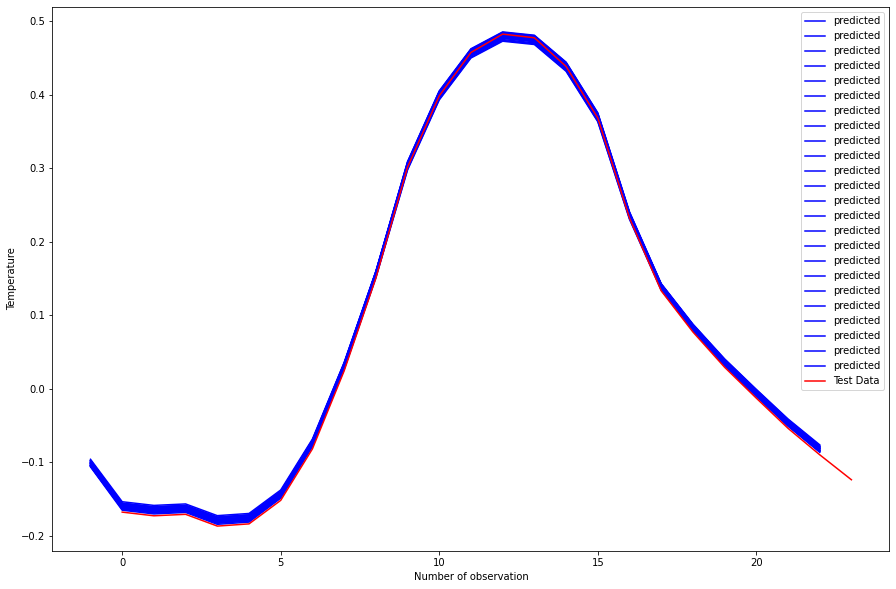

In [ ]:
plt.figure(figsize=(15, 10))
for i in range(len(m)):
  plt.plot(range(-1,23),m[i],color='blue',label='predicted')
plt.plot(y_test,color='red', label="Test Data")
plt.xlabel('Number of observation')
plt.ylabel('Temperature')
plt.legend()
plt.savefig('all_24_step.png')

# ARIMA with Auto_ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
ADF_result = adfuller(cam)
print('ADF Statistic: %f' % ADF_result[0])
print('p-value: %f' % ADF_result[1])

ADF Statistic: -3.346945
p-value: 0.012906


In [ ]:
#pip install pmdarima

In [ ]:
#ARIMA model
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
X = cam.values
train, test = X[0:2136], X[2136:2160]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,4))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
#errors
errors = abs(predictions - test)
print('MAE:\t', round(np.mean(errors), 1))
error = np.sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % error)
mape = 100 * (errors / test)
print('MAPE:\t', round(np.mean(mape), 2), '%.')

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  interval : int
/us

MAE:	 0.3
RMSE: 0.021
MAPE:	 -34.56 %.


In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Plot of ARIMA model')
#plt.plot(X,'o-',color='green',label='data')
plt.plot(range(0,2136),X[0:2136], color='red', label='Training data')
plt.plot(range(2136,2160) ,predictions, color='blue', label='Predicted data')
plt.xlabel('Number of observations',fontsize=15)
plt.ylabel('Temperature',fontsize=15)
plt.legend(fontsize="x-large")
plt.savefig('arima1.png')

NameError: ignored

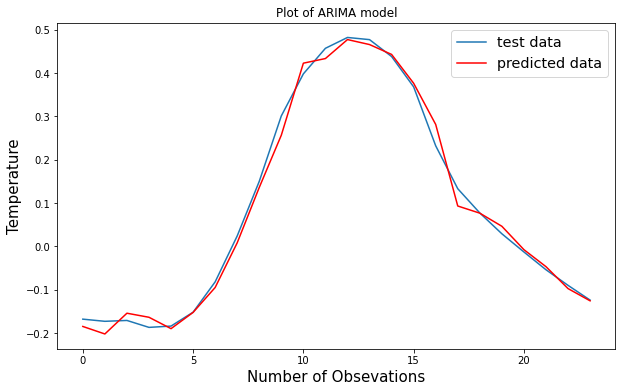

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test, label='test data')
plt.plot(predictions, color='red', label='predicted data')
plt.title('Plot of ARIMA model')
plt.ylabel('Temperature',fontsize=15)
plt.xlabel('Number of Obsevations',fontsize=15)
plt.legend(fontsize="x-large")
plt.savefig('arima2.png')
plt.show()

In [ ]:
from pmdarima import auto_arima
pq = []
#for name, column in df2[[ 'T2M']].iteritems():

print(f'Searching order of p and q for : ')
stepwise_model = auto_arima(cam,start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
parameter = stepwise_model.get_params().get('order')
print(f'optimal order for trend: is: {parameter} \n\n')
pq.append(stepwise_model.get_params().get('order'))

# Simple RNN and LSTM

In [ ]:
from numpy import array
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
X = cam.values
train1, test1 = X[0:2135], X[2135:2160]

In [ ]:
len(test1)

25

In [ ]:
n_steps = 1
X_train, y_train= split_sequence(train1.reshape(len(train1) , 1), n_steps)

In [ ]:
n_steps = 1
X_test, y_test= split_sequence(test1.reshape(len(test1) , 1), n_steps)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2134, 1, 1) (24, 1, 1) (2134, 1) (24, 1)


In [ ]:
from sklearn.metrics import mean_squared_error, explained_variance_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,SimpleRNN
from keras.layers import Dropout
import tensorflow
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [ ]:
model= Sequential()
#adding the first LSTM layer and some dropout regularization
model.add(LSTM(units=100, activation='relu', return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=100, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1))
#Compiling the RNN
model.compile(optimizer='adam', loss= 'mean_squared_error')
#Fitting the RNN to the training set
history=model.fit(X_train, y_train, epochs=10, batch_size=64)
history.history

Epoch 1/10
33/33 [==============================] - 3s 7ms/step - loss: 0.1811
Epoch 2/10
33/33 [==============================] - 0s 8ms/step - loss: 0.1026
Epoch 3/10
33/33 [==============================] - 0s 7ms/step - loss: 0.0197
Epoch 4/10
33/33 [==============================] - 0s 7ms/step - loss: 0.0145
Epoch 5/10
33/33 [==============================] - 0s 7ms/step - loss: 0.0142
Epoch 6/10
33/33 [==============================] - 0s 7ms/step - loss: 0.0141
Epoch 7/10
33/33 [==============================] - 0s 7ms/step - loss: 0.0139
Epoch 8/10
33/33 [==============================] - 0s 7ms/step - loss: 0.0139
Epoch 9/10
33/33 [==============================] - 0s 8ms/step - loss: 0.0138
Epoch 10/10
33/33 [==============================] - 0s 7ms/step - loss: 0.0138


{'loss': [0.18108497560024261,
  0.10264728218317032,
  0.01968819461762905,
  0.014535515569150448,
  0.014157693833112717,
  0.01408006064593792,
  0.013905002735555172,
  0.013855292461812496,
  0.013756204396486282,
  0.013778338208794594]}

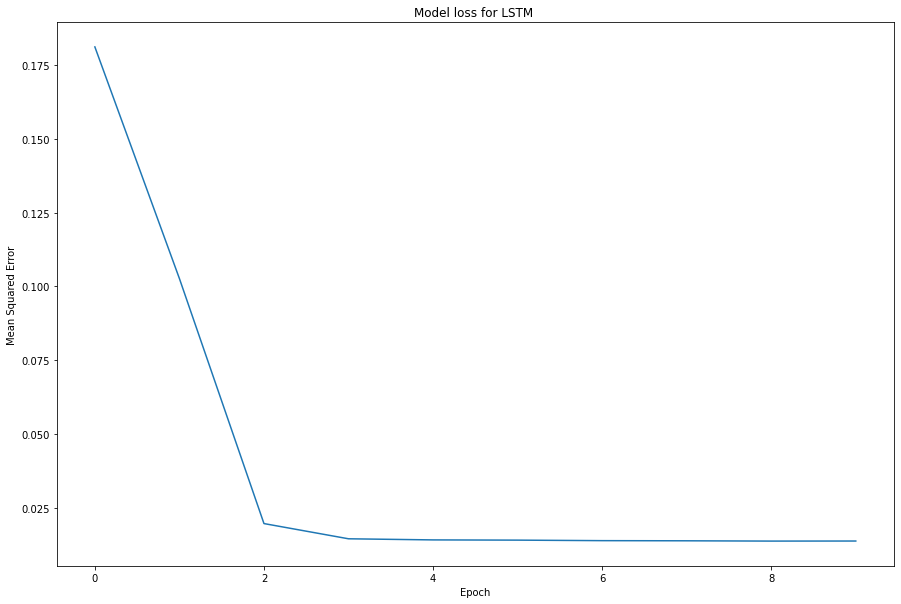

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'])
plt.title('Model loss for LSTM ')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.savefig('lstmloss.png')
plt.show()

In [ ]:
predicted_t2m=model.predict(X_test)

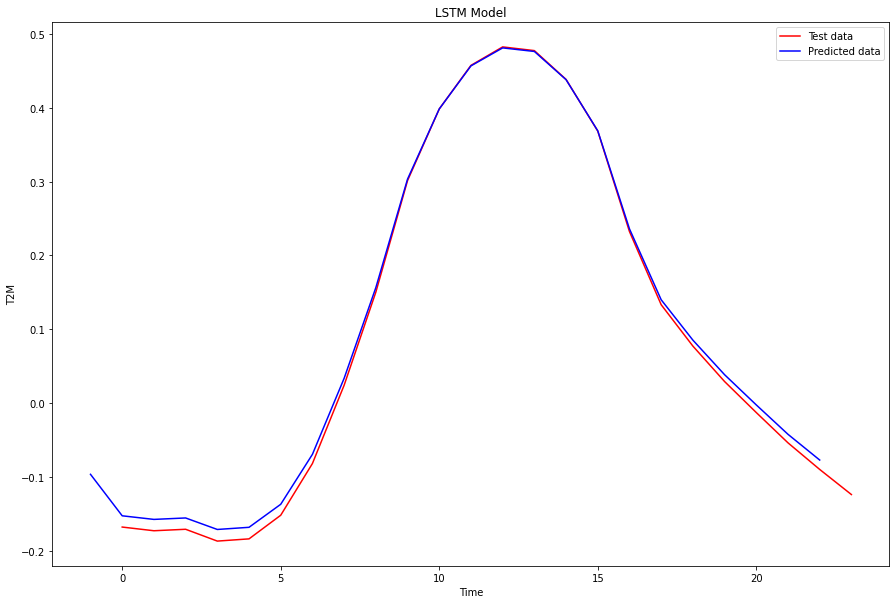

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(y_test, color='red', label='Test data')
plt.plot(range(-1,23),predicted_t2m, color='blue', label='Predicted data')
plt.title('LSTM Model')
plt.xlabel('Time')
plt.ylabel('T2M')
plt.legend()
plt.savefig('lstm.png')
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return ({'MAPE':mape, 'ME':me, 'MAE': mae, 
            'MPE': mpe, 'RMSE':rmse})
forecast_accuracy(predicted_t2m, y_test)

{'MAE': 0.05921439856405758,
 'MAPE': 0.7260869301037013,
 'ME': 0.008696264213294903,
 'MPE': -0.2966280468234957,
 'RMSE': 0.0703765583069127}

# Simple RNN

In [ ]:
model1= Sequential()
#adding the first LSTM layer and some dropout regularization
model1.add(SimpleRNN(100, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model1.add(SimpleRNN(100,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1))
#Compiling the RNN
model1.compile(optimizer='adam', loss= 'mean_squared_error')
#Fitting the RNN to the training set
history1=model1.fit(X_train, y_train, epochs=10, batch_size=32)
history1.history

Epoch 1/10
66/66 [==============================] - 2s 5ms/step - loss: 0.0335
Epoch 2/10
66/66 [==============================] - 0s 4ms/step - loss: 0.0161
Epoch 3/10
66/66 [==============================] - 0s 4ms/step - loss: 0.0157
Epoch 4/10
66/66 [==============================] - 0s 4ms/step - loss: 0.0154
Epoch 5/10
66/66 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 6/10
66/66 [==============================] - 0s 4ms/step - loss: 0.0152
Epoch 7/10
66/66 [==============================] - 0s 5ms/step - loss: 0.0157
Epoch 8/10
66/66 [==============================] - 0s 4ms/step - loss: 0.0155
Epoch 9/10
66/66 [==============================] - 0s 5ms/step - loss: 0.0153
Epoch 10/10
66/66 [==============================] - 0s 4ms/step - loss: 0.0154


{'loss': [0.033547770231962204,
  0.01610814779996872,
  0.01569497399032116,
  0.015393165871500969,
  0.015856927260756493,
  0.015235689468681812,
  0.01574447751045227,
  0.01550983265042305,
  0.015347042120993137,
  0.015444755554199219]}

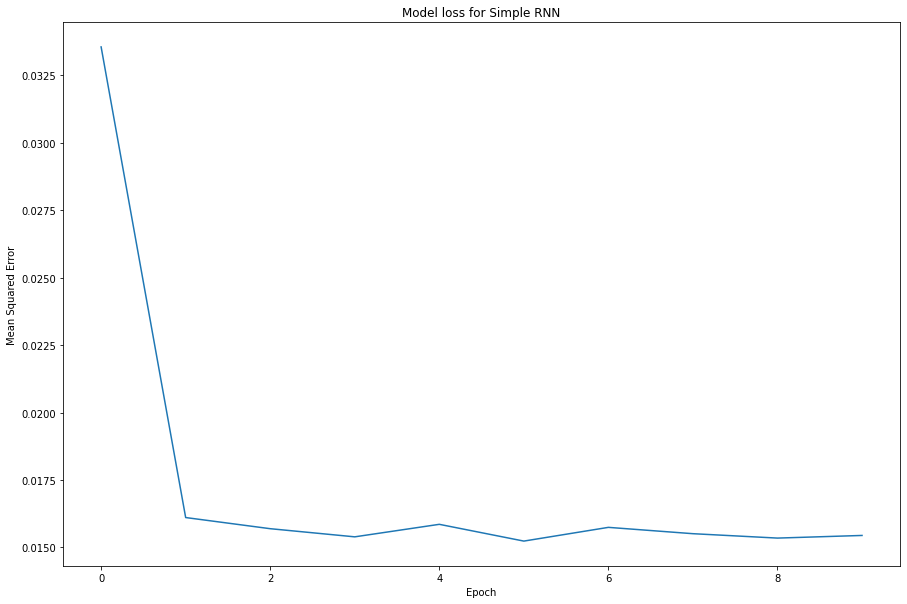

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(history1.history['loss'])
plt.title('Model loss for Simple RNN')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.savefig('simplernn.png')
plt.show()

In [ ]:
predicted=model1.predict(X_test)

In [ ]:
predicted.shape

(24, 1)

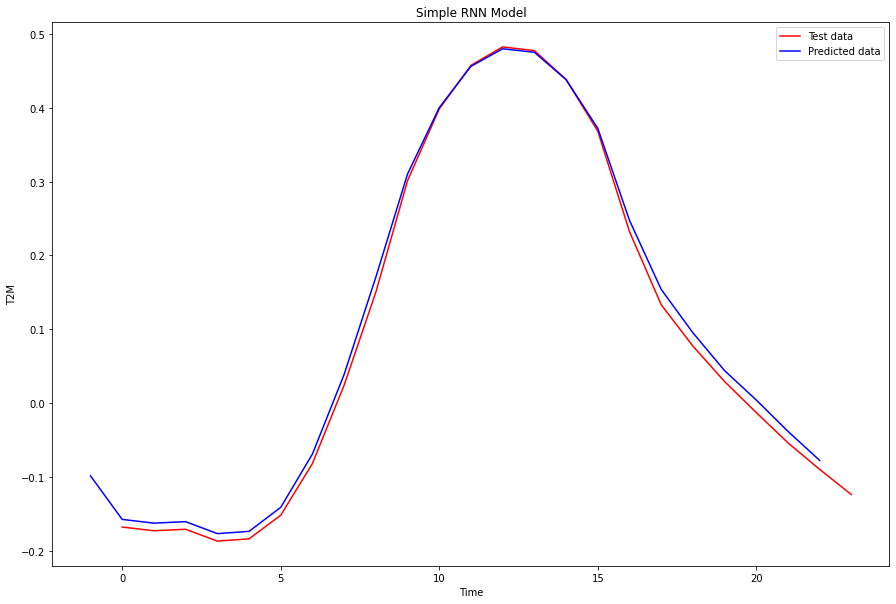

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(y_test, color='red', label='Test data')
plt.plot(range(-1,23),predicted, color='blue', label='Predicted data')
plt.title('Simple RNN Model')
plt.xlabel('Time')
plt.ylabel('T2M')
plt.legend()
plt.savefig('simplernn1.png')
plt.show()

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return ({'MAPE':mape, 'ME':me, 'MAE': mae, 
            'MPE': mpe, 'RMSE':rmse})
forecast_accuracy(predicted, y_test)

{'MAE': 0.0596957228344252,
 'MAPE': 0.7700804815515482,
 'ME': 0.010695449944308518,
 'MPE': -0.28168709988305357,
 'RMSE': 0.07076914933217536}